### Data Exploration

In [1]:
# pip install lightgbm catboost xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
import pickle


In [3]:
dataset = pd.read_csv('house_price.csv')

In [4]:
dataset

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,year,date,source,condition
0,110880,720,154,4,Октябрьский район,Магистраль,кирпичный,12,14,2023.0,2023-02-04 20:05:01,Site,под самоотделку (ПСО)
1,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023.0,2023-02-04 20:04:49,Site,под самоотделку (ПСО)
2,57750,750,77,2,Октябрьский район,Магистраль,монолитный,5,12,2023.0,2023-02-04 20:04:37,Site,под самоотделку (ПСО)
3,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023.0,2023-02-04 20:04:01,Site,под самоотделку (ПСО)
4,55000,1279,43,1,Ленинский район,Академия Наук,кирпичный,1,12,2013.0,2023-02-04 20:02:37,Site,хорошее
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45000,881,51,1,Октябрьский район,NaN,панельный,9,9,2021.0,2022-11-30 00:40:24,Android,евроремонт
9996,150000,1456,103,3,Октябрьский район,Магистраль,монолитный,3,12,2019.0,2022-11-30 00:03:22,Site,NaN
9997,120000,1143,105,5,Ленинский район,Московская - Белинка,кирпичный,5,6,1990.0,2022-11-29 23:52:23,Site,хорошее
9998,62000,969,64,2,Октябрьский район,Тунгуч м-н,монолитный,6,12,NaN,2022-11-29 23:21:20,Android,евроремонт


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           10000 non-null  int64  
 1   m2_price        10000 non-null  int64  
 2   square          10000 non-null  int64  
 3   rooms           10000 non-null  object 
 4   district        9990 non-null   object 
 5   micro_district  9543 non-null   object 
 6   building_type   10000 non-null  object 
 7   floor           10000 non-null  int64  
 8   floors          10000 non-null  int64  
 9   year            5631 non-null   float64
 10  date            10000 non-null  object 
 11  source          10000 non-null  object 
 12  condition       7081 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1015.8+ KB


In [6]:
dataset['district'].value_counts()

district
Октябрьский район     5211
Ленинский район       2010
Первомайский район    1706
Свердловский район    1063
Name: count, dtype: int64

In [7]:
dataset['micro_district'].unique()

array(['Магистраль', 'Академия Наук', 'ЖД вокзал', nan, 'Аламедин-1 м-н',
       '6 м-н', 'Кок-Жар ж/м', 'Асанбай м-н', 'Джал-23 м-н (Нижний Джал)',
       'Военторг', 'АЮ Grand', 'Восток-5 м-н', 'Молодая Гвардия',
       'Верхний Джал м-н', 'КНУ', '4 м-н', 'Политех', 'Джал 15 м-н',
       'Ипподром', 'Площадь Победы', '11 м-н', 'Мед. академия', 'Ак Кеме',
       'Моссовет', 'Горького - Панфилова', 'Московская - Белинка',
       'Старый аэропорт', 'АУЦА', 'Дворец спорта', '12 м-н', 'Гоин',
       'Московская - Уметалиева', 'Парк Ататюрк', 'Жилгородок Ницца',
       'Карла Маркса', 'ЦУМ', 'Сквер Тоголок Молдо', 'Бишкек-Парк',
       'Душанбинка', 'Восточный автовокзал', 'Центральная мечеть',
       'Юбилейка', 'Космос', '8 м-н', 'Кара-Жыгач ж/м',
       'Джальская больница', 'Средний Джал м-н', 'Золотой квадрат',
       'Ден Сяопина - Фучика', 'Нижний Токольдош', '5 м-н', 'Матросова',
       'Парк Панфилова/Спартак', '7 м-н', 'Карпинка', 'Кудайберген',
       'Джал-29 м-н', 'Улан м-н', 

In [8]:
district_microdistrict_mapping = dataset.groupby('district')['micro_district'].unique().to_dict()

for district, micro_districts in district_microdistrict_mapping.items():
    print(f"\nDistrict: {district}, \nMicro-districts: {', '.join(map(str, micro_districts))}")


District: Ленинский район, 
Micro-districts: Академия Наук, Джал-23 м-н (Нижний Джал), Молодая Гвардия, Верхний Джал м-н, Джал 15 м-н, Ипподром, Ак Кеме, Московская - Белинка, Старый аэропорт, Московская - Уметалиева, Джальская больница, Средний Джал м-н, Джал-29 м-н, Пишпек ж/м, БГУ, Госрегистр, Азия Молл, Шлагбаум, nan, Филармония, Джал-30 м-н, Нижний Джал м-н, Джал 30, Гагарина, Ак-Орго ж/м, Арча-Бешик ж/м, Баха, Кызыл-Аскер ж/м, Ошский рынок, Киргизия 1 ж/м, Рабочий Городок, с. Орто-Сай, с. Чон-Арык, Ак-Ордо ж/м, Киргизия-2 м-н, Ынтымак ж/м, 69-га, Кара Дарыя

District: Октябрьский район, 
Micro-districts: Магистраль, nan, 6 м-н, Кок-Жар ж/м, Асанбай м-н, АЮ Grand, 4 м-н, 11 м-н, Мед. академия, АУЦА, 12 м-н, Парк Ататюрк, Жилгородок Ницца, Карла Маркса, 8 м-н, Кара-Жыгач ж/м, 5 м-н, Матросова, 7 м-н, Улан м-н, Кок-Жар м-н, 3 м-н, КГУСТА, 10 м-н, Тунгуч м-н, 9 м-н, Советская - Скрябина, Кара Дарыя, Ген прокуратура, Таш Рабат, Жилгородок Совмина ж/м, Улан-2 м-н, Алматинка - Магистра

In [9]:
dataset['building_type'].value_counts()

building_type
монолитный    4790
кирпичный     3127
панельный     2083
Name: count, dtype: int64

In [10]:
dataset['floor'].value_counts()

floor
 3     1192
 4     1121
 2      995
 5      932
 9      858
 7      819
 1      767
 8      765
 10     669
 6      668
 12     424
 11     405
 13     184
 14     129
 15      40
 16      15
-1       13
 18       2
 17       2
Name: count, dtype: int64

In [11]:
dataset['floors'].value_counts()

floors
9     2000
12    1774
10    1504
14     969
5      965
4      853
13     427
16     361
8      201
3      182
15     170
11     154
6      127
7      101
18      69
2       56
17      25
19      23
25      20
1        9
20       5
22       2
21       1
24       1
23       1
Name: count, dtype: int64

In [12]:
dataset['condition'].value_counts()

condition
евроремонт               2455
под самоотделку (ПСО)    1899
хорошее                  1890
среднее                   550
требует ремонта           184
не достроено               57
черновая отделка           36
свободная планировка       10
Name: count, dtype: int64

### Data Cleaning

In [13]:
dataset = dataset.drop(['date', 'source', 'year', 'floor'], axis=1)
dataset.head()

,price,m2_price,square,rooms,district,micro_district,building_type,floors,condition
0,110880,720,154,4,Октябрьский район,Магистраль,кирпичный,14,под самоотделку (ПСО)
1,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,12,под самоотделку (ПСО)
2,57750,750,77,2,Октябрьский район,Магистраль,монолитный,12,под самоотделку (ПСО)
3,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,12,под самоотделку (ПСО)
4,55000,1279,43,1,Ленинский район,Академия Наук,кирпичный,12,хорошее


In [14]:
dataset = dataset.dropna(subset=['district'])

dataset.head()

,price,m2_price,square,rooms,district,micro_district,building_type,floors,condition
0,110880,720,154,4,Октябрьский район,Магистраль,кирпичный,14,под самоотделку (ПСО)
1,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,12,под самоотделку (ПСО)
2,57750,750,77,2,Октябрьский район,Магистраль,монолитный,12,под самоотделку (ПСО)
3,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,12,под самоотделку (ПСО)
4,55000,1279,43,1,Ленинский район,Академия Наук,кирпичный,12,хорошее


In [15]:
categorical_columns = ['district', 'micro_district', 'building_type', 'condition']

for column in categorical_columns:
    non_null_mask = ~dataset[column].isnull()
    dataset.loc[non_null_mask, column] = pd.Categorical(dataset.loc[non_null_mask, column]).codes

In [16]:
dataset.head()

,price,m2_price,square,rooms,district,micro_district,building_type,floors,condition
0,110880,720,154,4,1,83,0,14,2
1,57000,740,77,2,1,83,0,12,2
2,57750,750,77,2,1,83,1,12,2
3,57000,740,77,2,1,83,0,12,2
4,55000,1279,43,1,0,22,0,12,6


<b>District:</b><br>
October district == 1 <br>
Leninsky district == 0 <br>
Pervomaysky district == 2 <br>
Sverdlovsky district == 3 <br>

<b>Building Type:</b><br>
monolith == 1 <br>
brick == 0 <br>
panel == 2

<b>Condition:</b><br>
euro renovation  == 0 <br>
self-finishing == 2 <br>
good == 6 <br>
average == 4 <br>
requires repair == 5 <br>
unfinished == 1 <br>
rough finish == 7 <br>
free layout == 3 <br>
Null == 2

In [17]:
dataset['condition'].value_counts()

condition
0    2455
2    1899
6    1890
4     550
5     184
1      57
7      36
3      10
Name: count, dtype: int64

In [18]:
dataset['micro_district'].value_counts()

micro_district
83     1973
75      346
7       248
4       233
37      217
       ... 
56        1
132       1
112       1
19        1
80        1
Name: count, Length: 134, dtype: int64

In [19]:
dataset['rooms'].value_counts()

rooms
2                       3575
3                       3001
1                       2616
4                        671
5                         75
6 и более                 41
свободная планировка      11
Name: count, dtype: int64

In [20]:
dataset['rooms'] = dataset['rooms'].replace({'6 и более': 6})

dataset = dataset[dataset['rooms'] != 'свободная планировка']

In [21]:
dataset['rooms'].value_counts()

rooms
2    3575
3    3001
1    2616
4     671
5      75
6      41
Name: count, dtype: int64

### Filling the Null Values for 'condition' and 'micro_district' Columns using ML

In [22]:
dataset

,price,m2_price,square,rooms,district,micro_district,building_type,floors,condition
0,110880,720,154,4,1,83,0,14,2
1,57000,740,77,2,1,83,0,12,2
2,57750,750,77,2,1,83,1,12,2
3,57000,740,77,2,1,83,0,12,2
4,55000,1279,43,1,0,22,0,12,6
...,...,...,...,...,...,...,...,...,...
9995,45000,881,51,1,1,NaN,2,9,0
9996,150000,1456,103,3,1,83,1,12,NaN
9997,120000,1143,105,5,0,88,0,6,6
9998,62000,969,64,2,1,113,1,12,0


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9979 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           9979 non-null   int64 
 1   m2_price        9979 non-null   int64 
 2   square          9979 non-null   int64 
 3   rooms           9979 non-null   object
 4   district        9979 non-null   object
 5   micro_district  9533 non-null   object
 6   building_type   9979 non-null   object
 7   floors          9979 non-null   int64 
 8   condition       7070 non-null   object
dtypes: int64(4), object(5)
memory usage: 779.6+ KB


In [24]:
dataset['condition'] = dataset['condition'].astype('category')

train_data = dataset[dataset['condition'].notnull()]
test_data = dataset[dataset['condition'].isnull()]

X_train = train_data.drop('condition', axis=1)
y_train = train_data['condition']
X_test = test_data.drop('condition', axis=1)

classifier = RandomForestClassifier(random_state=42)

imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

classifier.fit(X_train_imputed, y_train)

predicted_values = classifier.predict(X_test_imputed)

dataset.loc[dataset['condition'].isnull(), 'condition'] = predicted_values

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9979 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           9979 non-null   int64   
 1   m2_price        9979 non-null   int64   
 2   square          9979 non-null   int64   
 3   rooms           9979 non-null   object  
 4   district        9979 non-null   object  
 5   micro_district  9533 non-null   object  
 6   building_type   9979 non-null   object  
 7   floors          9979 non-null   int64   
 8   condition       9979 non-null   category
dtypes: category(1), int64(4), object(4)
memory usage: 711.7+ KB


In [26]:
dataset['condition'].value_counts()

condition
0    3524
6    2707
2    2701
4     703
5     225
1      65
7      45
3       9
Name: count, dtype: int64

In [27]:
dataset['micro_district'] = dataset['micro_district'].astype('category')

train_data_micro = dataset[dataset['micro_district'].notnull()]
test_data_micro = dataset[dataset['micro_district'].isnull()]

X_train_micro = train_data_micro.drop('micro_district', axis=1)
y_train_micro = train_data_micro['micro_district']
X_test_micro = test_data_micro.drop('micro_district', axis=1)

classifier_micro = RandomForestClassifier(random_state=42)

imputer_micro = SimpleImputer(strategy='most_frequent')
X_train_imputed_micro = imputer_micro.fit_transform(X_train_micro)
X_test_imputed_micro = imputer_micro.transform(X_test_micro)

classifier_micro.fit(X_train_imputed_micro, y_train_micro)
predicted_values_micro = classifier_micro.predict(X_test_imputed_micro)

dataset.loc[dataset['micro_district'].isnull(), 'micro_district'] = predicted_values_micro

In [28]:
dataset['micro_district'].value_counts()

micro_district
83     2140
75      405
7       255
4       240
37      220
       ... 
9         1
56        1
21        1
31        1
133       1
Name: count, Length: 134, dtype: int64

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9979 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           9979 non-null   int64   
 1   m2_price        9979 non-null   int64   
 2   square          9979 non-null   int64   
 3   rooms           9979 non-null   object  
 4   district        9979 non-null   object  
 5   micro_district  9979 non-null   category
 6   building_type   9979 non-null   object  
 7   floors          9979 non-null   int64   
 8   condition       9979 non-null   category
dtypes: category(2), int64(4), object(3)
memory usage: 658.4+ KB


In [30]:
dataset['rooms'] = dataset['rooms'].astype(int)
dataset['district'] = dataset['district'].astype(int)
dataset['building_type'] = dataset['building_type'].astype(int)
dataset['micro_district'] = dataset['micro_district'].astype(int)
dataset['condition'] = dataset['condition'].astype(int)

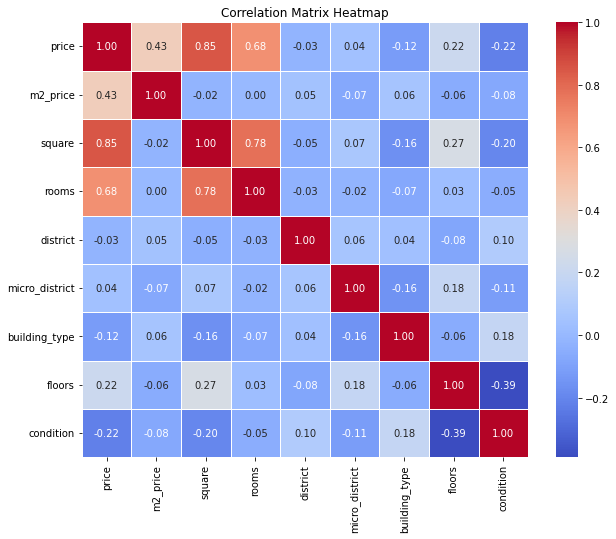

In [31]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9979 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   price           9979 non-null   int64
 1   m2_price        9979 non-null   int64
 2   square          9979 non-null   int64
 3   rooms           9979 non-null   int32
 4   district        9979 non-null   int32
 5   micro_district  9979 non-null   int32
 6   building_type   9979 non-null   int32
 7   floors          9979 non-null   int64
 8   condition       9979 non-null   int32
dtypes: int32(5), int64(4)
memory usage: 584.7 KB


In [33]:
district_microdistrict_mapping = dataset.groupby('district')['micro_district'].unique().to_dict()

for district, micro_districts in district_microdistrict_mapping.items():
    print(f"\nDistrict: {district}, \nMicro-districts: {', '.join(map(str, micro_districts))}")


District: 0, 
Micro-districts: 22, 51, 87, 34, 49, 65, 17, 88, 107, 89, 54, 106, 52, 98, 30, 45, 16, 126, 120, 53, 91, 50, 39, 20, 28, 32, 82, 95, 73, 101, 132, 133, 21, 74, 128, 9, 68

District: 1, 
Micro-districts: 83, 8, 75, 29, 15, 6, 2, 113, 86, 14, 4, 96, 61, 70, 11, 69, 7, 85, 10, 68, 114, 76, 5, 66, 0, 12, 105, 40, 111, 62, 115, 26, 112, 27, 102, 23, 119, 118, 94

District: 2, 
Micro-districts: 60, 104, 36, 67, 100, 99, 90, 44, 46, 33, 59, 79, 127, 64, 47, 97, 81, 13, 18, 35, 131, 1, 3, 57, 19, 58, 77, 103, 108, 31, 72

District: 3, 
Micro-districts: 24, 37, 41, 121, 38, 122, 130, 92, 71, 109, 123, 125, 124, 63, 18, 110, 117, 43, 42, 25, 55, 84, 78, 116, 93, 56, 129, 48, 80


In [34]:
dataset.head()

,price,m2_price,square,rooms,district,micro_district,building_type,floors,condition
0,110880,720,154,4,1,83,0,14,2
1,57000,740,77,2,1,83,0,12,2
2,57750,750,77,2,1,83,1,12,2
3,57000,740,77,2,1,83,0,12,2
4,55000,1279,43,1,0,22,0,12,6


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9979 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   price           9979 non-null   int64
 1   m2_price        9979 non-null   int64
 2   square          9979 non-null   int64
 3   rooms           9979 non-null   int32
 4   district        9979 non-null   int32
 5   micro_district  9979 non-null   int32
 6   building_type   9979 non-null   int32
 7   floors          9979 non-null   int64
 8   condition       9979 non-null   int32
dtypes: int32(5), int64(4)
memory usage: 584.7 KB


In [36]:
clean = dataset.copy()

clean.to_csv('clean.csv', index=False)

### ML Regression Models

In [37]:
X = dataset.drop('price', axis=1)
y = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# k-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
print(f'KNN Mean Squared Error: {knn_mse}')
print(f'KNN R-squared: {knn_r2}')

KNN Mean Squared Error: 60394873.168336675
KNN R-squared: 0.9678685693138352


In [39]:
with open("knn.pkl", "wb") as f:
    pickle.dump(knn_model, f)

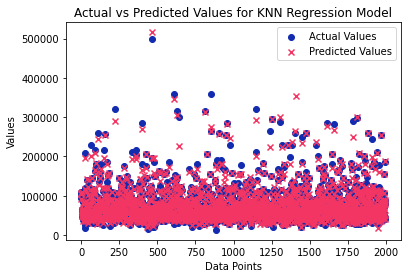

In [40]:
# KNN
plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o', color="#132CAF")
plt.scatter(range(len(knn_y_pred)), knn_y_pred, label='Predicted Values', marker='x', color="#F33563")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.title("Actual vs Predicted Values for KNN Regression Model")
plt.show()

In [41]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)
print(f'Linear Regression Mean Squared Error: {linear_mse}')
print(f'Linear Regression R-squared: {linear_r2}')

Linear Regression Mean Squared Error: 275047069.0363757
Linear Regression R-squared: 0.8536687740109632


In [42]:
with open("linear_regression.pkl", "wb") as f:
    pickle.dump(linear_model, f)

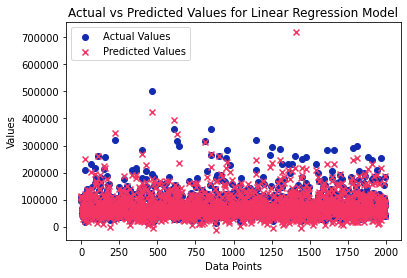

In [43]:
# Linear Regression
plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o', color="#132CAF")
plt.scatter(range(len(linear_y_pred)), linear_y_pred, label='Predicted Values', marker='x', color="#F33563")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.title("Actual vs Predicted Values for Linear Regression Model")
plt.show()

In [44]:
# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')

Random Forest Mean Squared Error: 7293360.287096067
Random Forest R-squared: 0.996119768314094


In [45]:
with open("random_forest.pkl", "wb") as f:
    pickle.dump(rf_model, f)

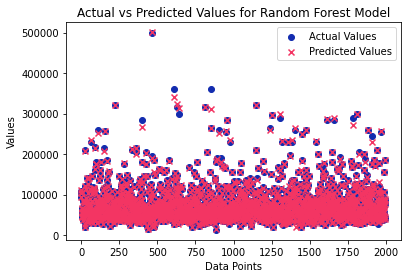

In [46]:
# Random Forest
plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o', color="#132CAF")
plt.scatter(range(len(rf_y_pred)), rf_y_pred, label='Predicted Values', marker='x', color="#F33563")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.title("Actual vs Predicted Values for Random Forest Model")
plt.show()

In [47]:
# Decision Trees
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
print(f'Decision Trees Mean Squared Error: {dt_mse}')
print(f'Decision Trees R-squared: {dt_r2}')

Decision Trees Mean Squared Error: 9311066.769079825
Decision Trees R-squared: 0.9950463030914718


In [48]:
with open("decision_tree.pkl", "wb") as f:
    pickle.dump(dt_model, f)

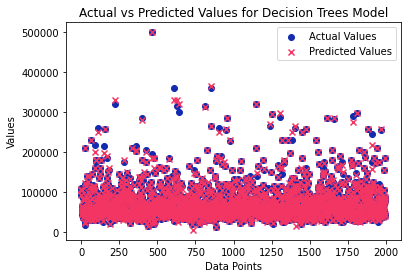

In [49]:
# Decision Trees
plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o', color="#132CAF")
plt.scatter(range(len(dt_y_pred)), dt_y_pred, label='Predicted Values', marker='x', color="#F33563")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.title("Actual vs Predicted Values for Decision Trees Model")
plt.show()

In [50]:
# Gradient Boosting
gradient_boost_model = GradientBoostingRegressor()
gradient_boost_model.fit(X_train, y_train)
gradient_boost_y_pred = gradient_boost_model.predict(X_test)
gradient_boost_mse = mean_squared_error(y_test, gradient_boost_y_pred)
gradient_boost_r2 = r2_score(y_test, gradient_boost_y_pred)
print(f'Gradient Boosting Mean Squared Error: {gradient_boost_mse}')
print(f'Gradient Boosting R-squared: {gradient_boost_r2}')

Gradient Boosting Mean Squared Error: 70989478.80437069
Gradient Boosting R-squared: 0.9622320008638504


In [51]:
with open("gradient_boost.pkl", "wb") as f:
    pickle.dump(gradient_boost_model, f)

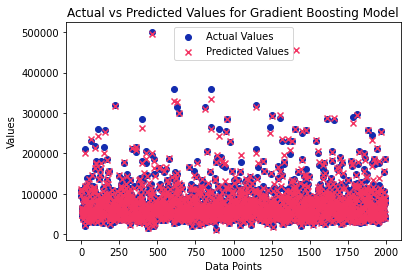

In [52]:
# Gradient Boosting
plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o', color="#132CAF")
plt.scatter(range(len(gradient_boost_y_pred)), gradient_boost_y_pred, label='Predicted Values', marker='x', color="#F33563")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.title("Actual vs Predicted Values for Gradient Boosting Model")
plt.show()

In [53]:
# XGBoost
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)
xgboost_y_pred = xgboost_model.predict(X_test)
xgboost_mse = mean_squared_error(y_test, xgboost_y_pred)
xgboost_r2 = r2_score(y_test, xgboost_y_pred)
print(f'XGBoost Mean Squared Error: {xgboost_mse}')
print(f'XGBoost R-squared: {xgboost_r2}')

XGBoost Mean Squared Error: 12592396.794573303
XGBoost R-squared: 0.9933005617273215


In [54]:
with open("xg_boost.pkl", "wb") as f:
    pickle.dump(xgboost_model, f)

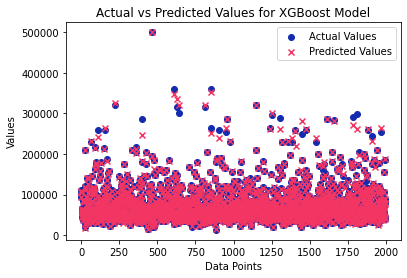

In [55]:
# XGBoost
plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o', color="#132CAF")
plt.scatter(range(len(xgboost_y_pred)), xgboost_y_pred, label='Predicted Values', marker='x', color="#F33563")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.title("Actual vs Predicted Values for XGBoost Model")
plt.show()

In [56]:
# CatBoost
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train)
catboost_y_pred = catboost_model.predict(X_test)
catboost_mse = mean_squared_error(y_test, catboost_y_pred)
catboost_r2 = r2_score(y_test, catboost_y_pred)
print(f'CatBoost Mean Squared Error: {catboost_mse}')
print(f'CatBoost R-squared: {catboost_r2}')

Learning rate set to 0.056849
0:	learn: 44248.8465800	total: 222ms	remaining: 3m 41s
1:	learn: 42243.0095113	total: 231ms	remaining: 1m 55s
2:	learn: 40393.4479002	total: 237ms	remaining: 1m 18s
3:	learn: 38640.5699638	total: 263ms	remaining: 1m 5s
4:	learn: 37009.6912391	total: 276ms	remaining: 54.9s
5:	learn: 35406.6269416	total: 282ms	remaining: 46.8s
6:	learn: 34019.3295623	total: 297ms	remaining: 42.1s
7:	learn: 32508.3210035	total: 308ms	remaining: 38.2s
8:	learn: 31179.9944564	total: 316ms	remaining: 34.8s
9:	learn: 29842.2445448	total: 329ms	remaining: 32.6s
10:	learn: 28596.4147713	total: 336ms	remaining: 30.2s
11:	learn: 27462.7598974	total: 342ms	remaining: 28.2s
12:	learn: 26322.2563496	total: 348ms	remaining: 26.4s
13:	learn: 25248.7687081	total: 356ms	remaining: 25.1s
14:	learn: 24245.7495303	total: 361ms	remaining: 23.7s
15:	learn: 23311.6004907	total: 370ms	remaining: 22.8s
16:	learn: 22437.6839981	total: 377ms	remaining: 21.8s
17:	learn: 21616.8563228	total: 383ms	rema

In [57]:
with open("catboost.pkl", "wb") as f:
    pickle.dump(catboost_model, f)

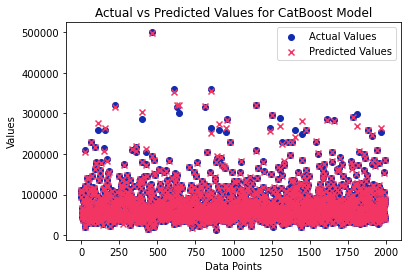

In [58]:
# CatBoost
plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o', color="#132CAF")
plt.scatter(range(len(catboost_y_pred)), catboost_y_pred, label='Predicted Values', marker='x', color="#F33563")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.title("Actual vs Predicted Values for CatBoost Model")
plt.show()

In [59]:
# LightGBM
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)
lgbm_y_pred = lgbm_model.predict(X_test)
lgbm_mse = mean_squared_error(y_test, lgbm_y_pred)
lgbm_r2 = r2_score(y_test, lgbm_y_pred)
print(f'LightGBM Mean Squared Error: {lgbm_mse}')
print(f'LightGBM R-squared: {lgbm_r2}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 7983, number of used features: 8
[LightGBM] [Info] Start training from score 76602.678567
LightGBM Mean Squared Error: 7486736.070239126
LightGBM R-squared: 0.996016888048825


In [60]:
with open("lightGBM.pkl", "wb") as f:
    pickle.dump(lgbm_model, f)

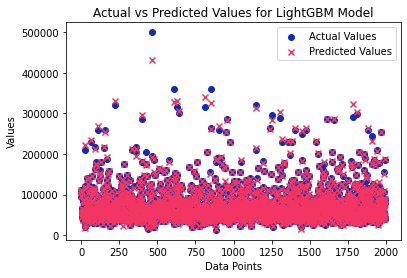

In [61]:
# LightGBM
plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o', color="#132CAF")
plt.scatter(range(len(lgbm_y_pred)), lgbm_y_pred, label='Predicted Values', marker='x', color="#F33563")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.title("Actual vs Predicted Values for LightGBM Model")
plt.show()

In [62]:
# AdaBoost
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(X_train, y_train)
adaboost_y_pred = adaboost_model.predict(X_test)
adaboost_mse = mean_squared_error(y_test, adaboost_y_pred)
adaboost_r2 = r2_score(y_test, adaboost_y_pred)
print(f'AdaBoost Mean Squared Error: {adaboost_mse}')
print(f'AdaBoost R-squared: {adaboost_r2}')

AdaBoost Mean Squared Error: 385555115.86771756
AdaBoost R-squared: 0.794876007990448


In [63]:
with open("adaboost.pkl", "wb") as f:
    pickle.dump(adaboost_model, f)

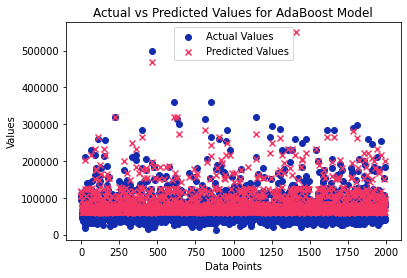

In [64]:
# AdaBoost
plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o', color="#132CAF")
plt.scatter(range(len(adaboost_y_pred)), adaboost_y_pred, label='Predicted Values', marker='x', color="#F33563")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.title("Actual vs Predicted Values for AdaBoost Model")
plt.show()

In [65]:
# Gaussian Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
naive_bayes_y_pred = naive_bayes_model.predict(X_test)
naive_bayes_mse = mean_squared_error(y_test, naive_bayes_y_pred)
naive_bayes_r2 = r2_score(y_test, naive_bayes_y_pred)
print(f'Naive Bayes Mean Squared Error: {naive_bayes_mse}')
print(f'Naive Bayes R-squared: {naive_bayes_r2}')

Naive Bayes Mean Squared Error: 755716298.1598196
Naive Bayes R-squared: 0.5979419348220806


In [66]:
with open("naive_bayes.pkl", "wb") as f:
    pickle.dump(naive_bayes_model, f)

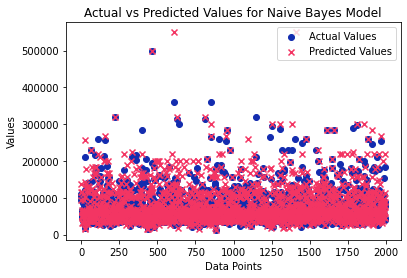

In [67]:
# Gaussian Naive Bayes
plt.scatter(range(len(y_test)), y_test, label='Actual Values', marker='o', color="#132CAF")
plt.scatter(range(len(naive_bayes_y_pred)), naive_bayes_y_pred, label='Predicted Values', marker='x', color="#F33563")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.title("Actual vs Predicted Values for Naive Bayes Model")
plt.show()

### Cross Validation

In [68]:
models = {
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),
    "LightGBM": LGBMRegressor(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsRegressor(),
    "Linear Regression": LinearRegression(),
    "Decision Tree":DecisionTreeRegressor()
    }

num_folds = 5

mse_scores = {}
r2_scores = {}
cv_mse_mean = {}
cv_r2_mean = {}

X = dataset.drop('price', axis=1)
y = dataset['price']

for model_name, model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse_scores[model_name] = mean_squared_error(y_test, y_pred)
    r2_scores[model_name] = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X, y, cv=num_folds, scoring='neg_mean_squared_error')
    cv_mse_mean[model_name] = -cv_scores.mean()
    cv_r2_scores = cross_val_score(model, X, y, cv=num_folds, scoring='r2')
    cv_r2_mean[model_name] = cv_r2_scores.mean()

print("Model\t\t\tMSE\t\t\tR2\t\t\tCV_MSE\t\t\tCV_R2")
for model_name in models.keys():
    print(f"{model_name.ljust(20)}\t{mse_scores[model_name]:.2f}\t{r2_scores[model_name]:.2f}\t"
          f"{cv_mse_mean[model_name]:.2f}\t{cv_r2_mean[model_name]:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 7983, number of used features: 8
[LightGBM] [Info] Start training from score 76602.678567
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 7983, number of used features: 8
[LightGBM] [Info] Start training from score 75360.099336
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 7983, number of used features: 8
[LightGBM] [Info] Start trai

c:\Users\aizhamal.zhetigenova\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\aizhamal.zhetigenova\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Model			MSE			R2			CV_MSE			CV_R2
Gradient Boosting   	74916935.81	0.96	47204526.78	0.98
Random Forest       	7475739.00	1.00	41042108.15	0.98
AdaBoost            	395932061.01	0.79	367616465.12	0.81
XGBoost             	12592396.79	0.99	41418335.26	0.98
CatBoost            	2939789.25	1.00	34620950.39	0.98
LightGBM            	7486736.07	1.00	53767719.24	0.98
Naive Bayes         	755716298.16	0.60	647005725.57	0.69
KNN                 	60394873.17	0.97	84401679.90	0.96
Linear Regression   	275047069.04	0.85	165470684.72	0.92
Decision Tree       	10324337.49	0.99	42043465.02	0.98


### Comparison

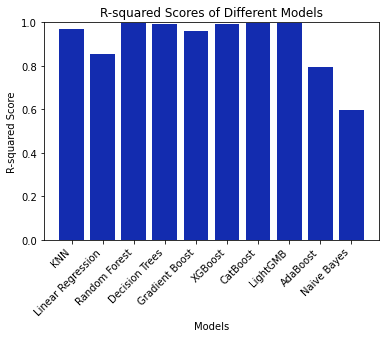

In [69]:
model_names = ['KNN', 'Linear Regression', 'Random Forest', 'Decision Trees', 'Gradient Boost', 'XGBoost', 'CatBoost', 'LightGMB', 'AdaBoost', 'Naive Bayes']
r2_scores = [knn_r2, linear_r2, rf_r2, dt_r2, gradient_boost_r2, xgboost_r2, catboost_r2, lgbm_r2, adaboost_r2, naive_bayes_r2]

plt.bar(model_names, r2_scores, color='#132CAF')
plt.ylim(0, 1)
plt.title('R-squared Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45, ha='right')
plt.show()

### Demo

In [70]:
m2_price = int(input("Enter the price per m^2: "))
area = float(input("Enter the area of the house: "))
rooms = int(input("Enter the number of rooms: "))
floors = int(input("Enter the number of floors: "))
district = int(input("Enter the district code: "))
micro_district = int(input("Enter the microdistrict code: "))
building_type = int(input("Enter the building type code: "))
condition = int(input("Enter the condition code: "))

ValueError: invalid literal for int() with base 10: ''

In [ ]:
# 1000, 154, 4, 1, 83, 0, 14, 2

In [ ]:
user_input = pd.DataFrame({
    'm2_price': [m2_price],
    'square': [area],
    'rooms': [rooms],
    'district': [district],
    'micro_district': [micro_district],
    'building_type': [building_type],
    'floors': [floors],
    'condition': [condition]
})

In [ ]:
with open("knn.pkl", "rb") as f:
    knn = pickle.load(f)

with open("catboost.pkl", "rb") as f:
    catboost = pickle.load(f)

with open("adaboost.pkl", "rb") as f:
    adaboost = pickle.load(f)

with open("decision_tree.pkl", "rb") as f:
    decision_tree = pickle.load(f)

with open("gradient_boost.pkl", "rb") as f:
    gradient_boost = pickle.load(f)

with open("lightGBM.pkl", "rb") as f:
    lightGBM = pickle.load(f)

with open("linear_regression.pkl", "rb") as f:
    linear_regression = pickle.load(f)

with open("random_forest.pkl", "rb") as f:
    random_forest = pickle.load(f)

with open("naive_bayes.pkl", "rb") as f:
    naive_bayes = pickle.load(f)

with open("xg_boost.pkl", "rb") as f:
    xg_boost = pickle.load(f)

In [ ]:
predicted_price = linear_regression.predict(user_input)
print(f'\nLinear Regression\'s prediction: {predicted_price[0]}')

predicted_price = knn.predict(user_input)
print(f'KNN\'s prediction: {predicted_price[0]}')

predicted_price = naive_bayes.predict(user_input)
print(f'\nNaive Bayes\' prediction: {predicted_price[0]}')

predicted_price = decision_tree.predict(user_input)
print(f'\nDecision Tree\'s prediction: {predicted_price[0]}')

predicted_price = random_forest.predict(user_input)
print(f'\nRandom Forests\'s prediction: {predicted_price[0]}')

predicted_price = adaboost.predict(user_input)
print(f'\nAdaBoost\'s prediction: {predicted_price[0]}')

predicted_price = xg_boost.predict(user_input)
print(f'\nXGBoost\'s prediction: {predicted_price[0]}')

predicted_price = gradient_boost.predict(user_input)
print(f'\nGradientBoost\'s prediction: {predicted_price[0]}')

predicted_price = catboost.predict(user_input)
print(f'\nCatBoost\'s prediction: {predicted_price[0]}')

predicted_price = lightGBM.predict(user_input)
print(f'\nLightGBM\'s prediction: {predicted_price[0]}')


Linear Regression's prediction: 53832.79801402778
KNN's prediction: 89800.0

Naive Bayes' prediction: 35800

Decision Tree's prediction: 100000.0

Random Forests's prediction: 99719.88

AdaBoost's prediction: 109889.98561840843

XGBoost's prediction: 100971.3515625

GradientBoost's prediction: 99697.4871121378

CatBoost's prediction: 99627.16013289496

LightGBM's prediction: 100025.9562802223
